<h5>Ley de Hooke<h5/>

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [171]:
datos_1 = pd.read_csv('resorte_1.csv', delimiter=';')
datos_2 = pd.read_csv('resorte_2.csv', delimiter=';')

In [172]:
#Longitud de los resortes
l_r1 = datos_2['L_R1']
l_r2 = datos_2['L_R2']
#Error instrumental
sigma_1 = datos_2['sigma_r']
sigma_2 = datos_2['sigma_b']
#Masas
m = np.array(datos_1['masa'])
#Longitud resorte 1 con masas
l_r1_m = np.array(datos_1['R_1'])
#longitud resorte 2 con masas
l_r2_m = np.array(datos_1['R_2'])
#longitud resorte 1 y 2 con masas 1 (r1 junto a r2)
l_r1_r2_m1 = np.array(datos_1['R_1_R_2_m1'])
#longitud resorte 1 y 2 con masas 2 (r1 sobre r2)
l_r1_r2_m2 = np.array(datos_1['R_1_R_2_m2'])

In [173]:
#Medidas iniciales del experimento
tabla_inicial = pd.DataFrame({'Longitud resorte 1 (cm)': l_r1, 
                              'Longitud resorte 2 (cm)': l_r2, 
                              'Error instrumental regla (cm)': sigma_1, 
                              'Error instrumental báscula (g)': sigma_2})
tabla_inicial

,Longitud resorte 1 (cm),Longitud resorte 2 (cm),Error instrumental regla (cm),Error instrumental báscula (g)
0,12.3,12.4,0.1,0.1


In [174]:
tabla_capturas = pd.DataFrame({'Masa (g)': m, 
                               'Longitud resorte 1 con masa (cm)': l_r1_m, 
                               'Longitud resorte 2 con masa (cm)': l_r2_m, 
                               'Longitud resorte 1 y 2 con masa 1 (cm)': l_r1_r2_m1, 
                               'Longitud resorte 1 y 2 con masa 2 (cm)': l_r1_r2_m2})
tabla_capturas

,Masa (g),Longitud resorte 1 con masa (cm),Longitud resorte 2 con masa (cm),Longitud resorte 1 y 2 con masa 1 (cm),Longitud resorte 1 y 2 con masa 2 (cm)
0,0.0,12.3,12.4,12.3,24.7
1,272.7,39.2,33.3,23.3,78.7
2,257.9,37.8,31.9,22.4,75.2
3,208.9,32.5,27.2,19.7,65.1
4,148.9,25.6,21.1,16.6,53.3
5,89.3,19.3,15.9,13.8,41.0


In [175]:
def estilo(ax):
    ax.set_xlabel(r'$m$')
    ax.set_ylabel(r'$\Delta$ $L$')
    ax.set_xticks(np.arange(0, 300, 40))
    ax.set_yticks(np.arange(10, 40, 5))
    ax.grid(True)

In [176]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

In [177]:
#regresion lineal de R1
reg_r1 = regresion_1(m, l_r1_m)

slope: 0.10116783577322426
intercept: 11.298034494086444
r: 0.9974309645600893
R^2: 0.9948685290632701
p: 9.891436893424105e-06
std_err: 0.003632875829764023


In [178]:
#regresion lineal de R2
reg_r2 = regresion_1(m, l_r2_m)

slope: 0.08031869103669714
intercept: 10.54540262890354
r: 0.9864601466034204
R^2: 0.9731036208368417
p: 0.0002737503303844248
std_err: 0.006676578989160086


In [179]:
#regresion lineal de R1 y R2 con masa 1
reg_r1_r2_m1 = regresion_1(m, l_r1_r2_m1)

slope: 0.04219579251729043
intercept: 11.140862275974197
r: 0.9808526375179665
R^2: 0.9620718965259514
p: 0.0005464223177460352
std_err: 0.0041890539331134


In [180]:
#regresion lineal de R1 y R2 con masa 2
reg_r1_r2_m2 = regresion_1(m, l_r1_r2_m2)

slope: 0.1983061408064609
intercept: 24.01934768892054
r: 0.9996467929807489
R^2: 0.9992937107166961
p: 1.871107654665048e-07
std_err: 0.0026360333381638436


Calculo de las constantes:

Tenemos que $K_1$, $K_2$, $K_{paralelo}$ y $K_{serie}$ se halla con las ecuaciones

$$
K=\frac{1}{pendiente}
$$

y para $K_{serie}$ comapramos el resultado con el obtenido de la siguiente ecuación utilizamos la ecuacion:

$$
K_{serieecc}=\frac{1}{\frac{1}{K_1}+\frac{1}{K_2}}
$$



In [207]:
K_r1 = 1/0.10116783577322426
K_r2 = 1/0.08031869103669714
K_r1_r2 = K_r1 + K_r2
K_para = 1/0.04219579251729043
K_serie = 1/0.1983061408064609
K_serie_ecc = 1/((1/K_r1) + (1/K_r2))

tabla_K = pd.DataFrame({'K_r1': [K_r1], 'K_r2': [K_r2], 'K_r1_r2': [K_r1_r2], 'K_para': [K_para], 'K_serie' : [K_serie], 'K_serie_ecc': [K_serie]})
tabla_K


,K_r1,K_r2,K_r1_r2,K_para,K_serie,K_serie_ecc
0,9.884565,12.450402,22.334967,23.699045,5.042708,5.042708


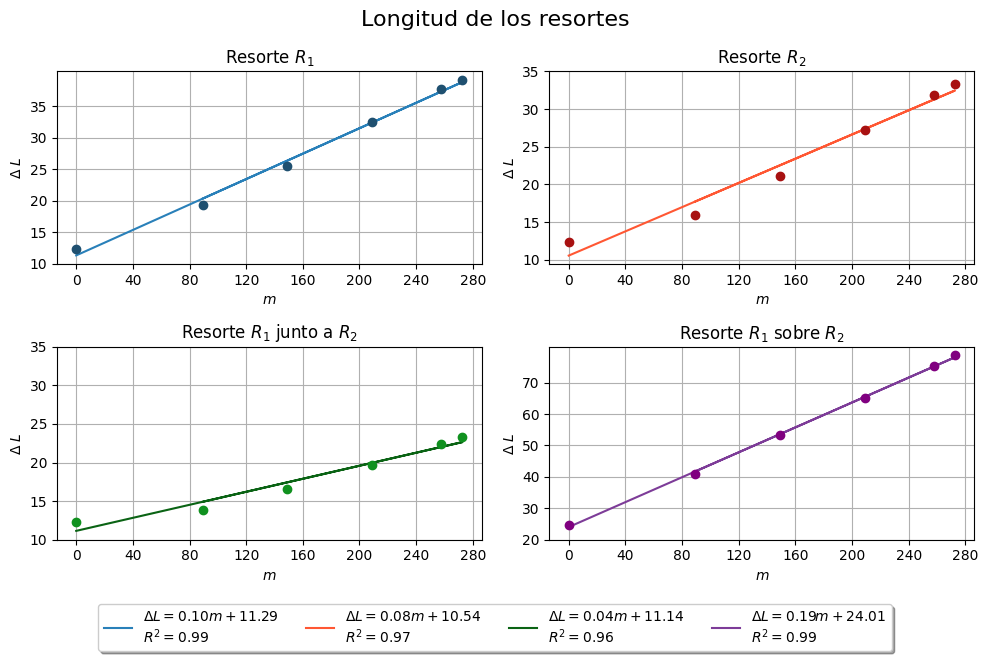

In [200]:
fig_1 = plt.figure(figsize=(10, 6))
fig_1.suptitle('Longitud de los resortes', fontsize=16)
spec = fig_1.add_gridspec(nrows=2, ncols=2, figure=fig_1)
ax1 = fig_1.add_subplot(spec[0, 0])
ax1.set_title(r'Resorte $R_1$')
ax1.plot(m, reg_r1,color='#2980b9', label=r'$\Delta L = 0.10m + 11.29$' + '\n' + r'$R^2 = 0.99$')
ax1.plot(m, l_r1_m, 'o', color='#1f5070')
estilo(ax1)
ax2 = fig_1.add_subplot(spec[0, 1])
ax2.set_title(r'Resorte $R_2$')
ax2.plot(m, reg_r2,color='#ff5733', label=r'$\Delta L = 0.08m + 10.54$' + '\n' + r'$R^2 = 0.97$')
ax2.plot(m, l_r2_m, 'o', color='#a81111')
estilo(ax2)
ax3 = fig_1.add_subplot(spec[1, 0])
ax3.set_title(r'Resorte $R_1$ junto a $R_2$')
ax3.plot(m, reg_r1_r2_m1,color='#0a6314', label=r'$\Delta L = 0.04m + 11.14$' + '\n' + r'$R^2 = 0.96$')
ax3.plot(m, l_r1_r2_m1, 'o', color='#10911f')
estilo(ax3)
ax4 = fig_1.add_subplot(spec[1, 1])
ax4.set_title(r'Resorte $R_1$ sobre $R_2$')
ax4.plot(m, reg_r1_r2_m2,color='#7d3c98', label=r'$\Delta L = 0.19m + 24.01$' + '\n' + r'$R^2 = 0.99$')
ax4.plot(m, l_r1_r2_m2, 'o', color='purple')
ax4.set_xlabel(r'$m$')
ax4.set_ylabel(r'$\Delta$ $L$')
ax4.set_xticks(np.arange(0, 300, 40))
ax4.set_yticks(np.arange(20, 80, 10))
ax4.grid(True)
fig_1.tight_layout()
fig_1.legend(loc='lower center',bbox_to_anchor=(0.5, -0.1), ncol=5,shadow=True, fancybox=True)
plt.savefig('resorte_grafica_1.png', dpi = 300, bbox_inches = 'tight')
fig_1.show()